In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [56]:
df = pd.read_csv('export.csv')

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2054 entries, 0 to 2053
Data columns (total 17 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Unnamed: 0                                     2054 non-null   int64  
 1   playerName                                     2054 non-null   object 
 2   team                                           2052 non-null   object 
 3   rating                                         2006 non-null   float64
 4   region                                         2054 non-null   object 
 5   agent                                          2054 non-null   object 
 6   playerCategory                                 2054 non-null   object 
 7   playerStatistics.average_combat_score          2054 non-null   float64
 8   playerStatistics.kill_deaths                   2054 non-null   float64
 9   playerStatistics.kill_assists_survived_traded  2006 

In [58]:
df.shape

(2054, 17)

In [59]:
##Checking the columns of the Dataset
df.columns

Index(['Unnamed: 0', 'playerName', 'team', 'rating', 'region', 'agent',
       'playerCategory', 'playerStatistics.average_combat_score',
       'playerStatistics.kill_deaths',
       'playerStatistics.kill_assists_survived_traded',
       'playerStatistics.average_damage_per_round',
       'playerStatistics.kills_per_round',
       'playerStatistics.assists_per_round',
       'playerStatistics.first_kills_per_round',
       'playerStatistics.first_deaths_per_round',
       'playerStatistics.headshot_percentage',
       'playerStatistics.clutch_success_percentage'],
      dtype='object')

In [60]:
#Changing the column names
colnames = ['Unnamed: 0','Player_Name', 'Team', 'Rating', 'Region', 'Agent', 'Player_Category',
       'Average_combat_score', 'Kill_deaths',
       'Kill_assists_survived_traded',
       'Average_damage_per_round',
       'Kills_per_round',
       'Assists_per_round',
       'First_kills_per_round',
       'First_deaths_per_round',
       'Headshot_percentage',
       'Clutch_success_percentage']

In [61]:
df.columns = colnames

In [62]:
colnames

['Unnamed: 0',
 'Player_Name',
 'Team',
 'Rating',
 'Region',
 'Agent',
 'Player_Category',
 'Average_combat_score',
 'Kill_deaths',
 'Kill_assists_survived_traded',
 'Average_damage_per_round',
 'Kills_per_round',
 'Assists_per_round',
 'First_kills_per_round',
 'First_deaths_per_round',
 'Headshot_percentage',
 'Clutch_success_percentage']

In [63]:
#Removing the colums which are not required
df.drop(columns=['Unnamed: 0'], inplace=True)


In [64]:
# Convert percentage strings to float

percentage_cols = [
    'Kill_assists_survived_traded',
    'Headshot_percentage',
    'Clutch_success_percentage'
]

for col in percentage_cols:
    df[col] = df[col].astype(str).str.replace('%', '', regex=False)
    df[col] = pd.to_numeric(df[col], errors='coerce') / 100

In [65]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2054 entries, 0 to 2053
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Player_Name                   2054 non-null   object 
 1   Team                          2052 non-null   object 
 2   Rating                        2006 non-null   float64
 3   Region                        2054 non-null   object 
 4   Agent                         2054 non-null   object 
 5   Player_Category               2054 non-null   object 
 6   Average_combat_score          2054 non-null   float64
 7   Kill_deaths                   2054 non-null   float64
 8   Kill_assists_survived_traded  2006 non-null   float64
 9   Average_damage_per_round      2054 non-null   float64
 10  Kills_per_round               2054 non-null   float64
 11  Assists_per_round             2054 non-null   float64
 12  First_kills_per_round         2054 non-null   float64
 13  Fir

In [66]:
df

,Player_Name,Team,Rating,Region,Agent,Player_Category,Average_combat_score,Kill_deaths,Kill_assists_survived_traded,Average_damage_per_round,Kills_per_round,Assists_per_round,First_kills_per_round,First_deaths_per_round,Headshot_percentage,Clutch_success_percentage
0,Kouf,AMB,1.53,Americas,"['reyna', 'kayo']",vct-challengers,298.0,1.48,0.74,185.9,1.03,0.36,0.13,0.03,0.35,0.15
1,nelu,63,1.31,Americas,"['viper', 'sova', 'breach']",vct-challengers,266.7,1.15,0.75,182.0,0.86,0.40,0.06,0.06,0.30,0.21
2,welyy,Blue,1.31,Americas,"['sova', 'fade', 'breach']",vct-challengers,240.9,1.26,0.74,164.1,0.82,0.39,0.07,0.04,0.27,0.10
3,ShoT_UP,TOR,1.29,Americas,"['skye', 'astra', 'killjoy']",vct-challengers,240.2,1.25,0.78,158.6,0.82,0.40,0.06,0.06,0.25,0.25
4,mada,NRG,1.26,Americas,"['raze', 'jett', 'reyna']",vct-challengers,268.8,1.34,0.76,172.9,0.93,0.19,0.24,0.13,0.26,0.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2049,ZaL,30,0.33,Pacific,['viper'],vct-challengers,106.5,0.30,0.40,68.1,0.27,0.17,0.07,0.13,0.27,NaN
2050,QuanTrọngLàTốcĐộ,35,0.29,Pacific,"['gekko', 'raze']",vct-challengers,101.5,0.27,0.37,68.0,0.26,0.14,0.00,0.17,0.11,0.17
2051,cara,PATH,0.27,Pacific,"['cypher', 'killjoy']",vct-challengers,103.0,0.25,0.44,72.9,0.24,0.29,0.06,0.15,0.11,NaN
2052,gogi,28,0.19,Pacific,"['skye', 'killjoy']",vct-challengers,82.0,0.18,0.36,60.5,0.18,0.18,0.00,0.25,0.12,NaN


In [67]:
#Checking for missing values
df.isnull()

,Player_Name,Team,Rating,Region,Agent,Player_Category,Average_combat_score,Kill_deaths,Kill_assists_survived_traded,Average_damage_per_round,Kills_per_round,Assists_per_round,First_kills_per_round,First_deaths_per_round,Headshot_percentage,Clutch_success_percentage
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2049,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2050,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2051,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2052,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [68]:
df.isnull().sum()

Player_Name                       0
Team                              2
Rating                           48
Region                            0
Agent                             0
Player_Category                   0
Average_combat_score              0
Kill_deaths                       0
Kill_assists_survived_traded     48
Average_damage_per_round          0
Kills_per_round                   0
Assists_per_round                 0
First_kills_per_round             0
First_deaths_per_round            0
Headshot_percentage              48
Clutch_success_percentage       578
dtype: int64

In [69]:
df[df['Rating'].isnull()]


,Player_Name,Team,Rating,Region,Agent,Player_Category,Average_combat_score,Kill_deaths,Kill_assists_survived_traded,Average_damage_per_round,Kills_per_round,Assists_per_round,First_kills_per_round,First_deaths_per_round,Headshot_percentage,Clutch_success_percentage
1305,Yaobaike,65,NaN,China,"['jett', 'omen']",vct-challengers,199.0,0.86,NaN,51.9,0.65,0.18,0.03,0.02,NaN,NaN
1306,huNter,ALG,NaN,China,['omen'],vct-challengers,116.5,0.32,NaN,76.3,0.29,0.46,0.06,0.14,NaN,NaN
1307,f1cio,ZYG,NaN,China,"['omen', 'killjoy']",vct-challengers,169.2,0.83,NaN,107.7,0.61,0.31,0.09,0.05,NaN,NaN
1308,FFs,ZYG,NaN,China,"['sova', 'harbor']",vct-challengers,129.0,0.62,NaN,88.7,0.44,0.35,0.03,0.07,NaN,NaN
1309,slowly,ZYG,NaN,China,"['yoru', 'omen']",vct-challengers,280.8,1.54,NaN,172.3,1.04,0.16,0.20,0.12,NaN,NaN
1310,B1SK,ZYG,NaN,China,"['neon', 'jett']",vct-challengers,235.0,1.08,NaN,148.2,0.78,0.14,0.15,0.21,NaN,NaN
1311,QiuYe,XG,NaN,China,['cypher'],vct-challengers,232.3,1.24,NaN,147.1,0.84,0.26,0.10,0.08,NaN,NaN
1312,Core,XG,NaN,China,['breach'],vct-challengers,192.7,0.93,NaN,127.9,0.69,0.39,0.02,0.07,NaN,NaN
1313,5CM,XG,NaN,China,['neon'],vct-challengers,189.7,0.64,NaN,126.4,0.59,0.26,0.18,0.16,NaN,NaN
1314,waituu,XG,NaN,China,"['brimstone', 'omen']",vct-challengers,191.7,0.89,NaN,122.8,0.69,0.38,0.08,0.20,NaN,NaN


In [70]:
#Droping the null from rating column 
df = df.dropna(subset=['Rating'])

In [71]:
#Droping the null from team column
df[df['Team'].isnull()]

,Player_Name,Team,Rating,Region,Agent,Player_Category,Average_combat_score,Kill_deaths,Kill_assists_survived_traded,Average_damage_per_round,Kills_per_round,Assists_per_round,First_kills_per_round,First_deaths_per_round,Headshot_percentage,Clutch_success_percentage
466,k0rupt,NaN,0.60,Americas,"['omen', 'viper', 'deadlock']",vct-challengers,154.8,0.65,0.61,101.2,0.53,0.15,0.14,0.14,0.28,0.22
505,karizma,NaN,0.52,Americas,"['raze', 'jett']",vct-challengers,170.5,0.64,0.53,108.8,0.58,0.13,0.15,0.35,0.27,NaN


In [72]:
df = df.dropna(subset=['Team'])


In [73]:
#filling 0 instead of nan
df['Clutch_success_percentage'] = df['Clutch_success_percentage'].fillna(0)


In [74]:
df.isnull().sum()
df.shape

(2004, 16)

In [75]:
df.head()

,Player_Name,Team,Rating,Region,Agent,Player_Category,Average_combat_score,Kill_deaths,Kill_assists_survived_traded,Average_damage_per_round,Kills_per_round,Assists_per_round,First_kills_per_round,First_deaths_per_round,Headshot_percentage,Clutch_success_percentage
0,Kouf,AMB,1.53,Americas,"['reyna', 'kayo']",vct-challengers,298.0,1.48,0.74,185.9,1.03,0.36,0.13,0.03,0.35,0.15
1,nelu,63,1.31,Americas,"['viper', 'sova', 'breach']",vct-challengers,266.7,1.15,0.75,182.0,0.86,0.40,0.06,0.06,0.30,0.21
2,welyy,Blue,1.31,Americas,"['sova', 'fade', 'breach']",vct-challengers,240.9,1.26,0.74,164.1,0.82,0.39,0.07,0.04,0.27,0.10
3,ShoT_UP,TOR,1.29,Americas,"['skye', 'astra', 'killjoy']",vct-challengers,240.2,1.25,0.78,158.6,0.82,0.40,0.06,0.06,0.25,0.25
4,mada,NRG,1.26,Americas,"['raze', 'jett', 'reyna']",vct-challengers,268.8,1.34,0.76,172.9,0.93,0.19,0.24,0.13,0.26,0.11


In [76]:
df.tail()

,Player_Name,Team,Rating,Region,Agent,Player_Category,Average_combat_score,Kill_deaths,Kill_assists_survived_traded,Average_damage_per_round,Kills_per_round,Assists_per_round,First_kills_per_round,First_deaths_per_round,Headshot_percentage,Clutch_success_percentage
2049,ZaL,30,0.33,Pacific,['viper'],vct-challengers,106.5,0.30,0.40,68.1,0.27,0.17,0.07,0.13,0.27,0.00
2050,QuanTrọngLàTốcĐộ,35,0.29,Pacific,"['gekko', 'raze']",vct-challengers,101.5,0.27,0.37,68.0,0.26,0.14,0.00,0.17,0.11,0.17
2051,cara,PATH,0.27,Pacific,"['cypher', 'killjoy']",vct-challengers,103.0,0.25,0.44,72.9,0.24,0.29,0.06,0.15,0.11,0.00
2052,gogi,28,0.19,Pacific,"['skye', 'killjoy']",vct-challengers,82.0,0.18,0.36,60.5,0.18,0.18,0.00,0.25,0.12,0.00
2053,FUZE,39,0.19,Pacific,"['cypher', 'sova']",vct-challengers,90.0,0.31,0.41,59.3,0.28,0.10,0.05,0.10,0.34,0.00


In [77]:
df.duplicated().sum()

np.int64(0)

In [116]:
cleaned_csv_path = 'cleaned_export.csv'
df.to_csv(cleaned_csv_path, index=False)
print(f"Cleaned CSV saved to {cleaned_csv_path}")

Cleaned CSV saved to cleaned_export.csv


Statistical Analysis

In [78]:
numerical_df = df.select_dtypes(include=['float64', 'int64'])
numerical_df.head()

,Rating,Average_combat_score,Kill_deaths,Kill_assists_survived_traded,Average_damage_per_round,Kills_per_round,Assists_per_round,First_kills_per_round,First_deaths_per_round,Headshot_percentage,Clutch_success_percentage
0,1.53,298.0,1.48,0.74,185.9,1.03,0.36,0.13,0.03,0.35,0.15
1,1.31,266.7,1.15,0.75,182.0,0.86,0.40,0.06,0.06,0.30,0.21
2,1.31,240.9,1.26,0.74,164.1,0.82,0.39,0.07,0.04,0.27,0.10
3,1.29,240.2,1.25,0.78,158.6,0.82,0.40,0.06,0.06,0.25,0.25
4,1.26,268.8,1.34,0.76,172.9,0.93,0.19,0.24,0.13,0.26,0.11


In [79]:
numerical_df.describe()

,Rating,Average_combat_score,Kill_deaths,Kill_assists_survived_traded,Average_damage_per_round,Kills_per_round,Assists_per_round,First_kills_per_round,First_deaths_per_round,Headshot_percentage,Clutch_success_percentage
count,2004.000000,2004.000000,2004.000000,2004.000000,2004.000000,2004.000000,2004.000000,2004.000000,2004.000000,2004.000000,2004.000000
mean,0.876173,183.982735,0.847405,0.657630,122.439820,0.637211,0.252530,0.089266,0.110100,0.275674,0.115409
std,0.199247,35.664274,0.225419,0.081937,22.791334,0.135621,0.103149,0.052416,0.056491,0.064183,0.099857
min,0.140000,61.500000,0.140000,0.300000,47.800000,0.140000,0.030000,0.000000,0.000000,0.070000,0.000000
25%,0.770000,163.575000,0.700000,0.620000,109.100000,0.560000,0.180000,0.060000,0.070000,0.230000,0.000000
50%,0.900000,184.900000,0.850000,0.670000,122.900000,0.640000,0.240000,0.080000,0.100000,0.270000,0.110000
75%,1.010000,206.700000,1.000000,0.710000,137.000000,0.720000,0.330000,0.110000,0.140000,0.310000,0.170000
max,1.580000,342.000000,1.960000,0.900000,211.400000,1.240000,0.720000,0.450000,0.490000,0.590000,1.000000


In [80]:
#Discriptive Statistics
# Mean
mean_values = numerical_df.mean()
print("🔹 Mean:\n", mean_values, "\n")




🔹 Mean:
 Rating                            0.876173
Average_combat_score            183.982735
Kill_deaths                       0.847405
Kill_assists_survived_traded      0.657630
Average_damage_per_round        122.439820
Kills_per_round                   0.637211
Assists_per_round                 0.252530
First_kills_per_round             0.089266
First_deaths_per_round            0.110100
Headshot_percentage               0.275674
Clutch_success_percentage         0.115409
dtype: float64 



In [81]:
# Median
median_values = numerical_df.median()
print("🔹 Median:\n", median_values, "\n")

🔹 Median:
 Rating                            0.90
Average_combat_score            184.90
Kill_deaths                       0.85
Kill_assists_survived_traded      0.67
Average_damage_per_round        122.90
Kills_per_round                   0.64
Assists_per_round                 0.24
First_kills_per_round             0.08
First_deaths_per_round            0.10
Headshot_percentage               0.27
Clutch_success_percentage         0.11
dtype: float64 



In [82]:

# Mode (might return multiple, so take the first row)
mode_values = numerical_df.mode().iloc[0]
print("🔹 Mode:\n", mode_values)

🔹 Mode:
 Rating                            0.97
Average_combat_score            164.50
Kill_deaths                       0.83
Kill_assists_survived_traded      0.68
Average_damage_per_round        106.20
Kills_per_round                   0.68
Assists_per_round                 0.19
First_kills_per_round             0.07
First_deaths_per_round            0.08
Headshot_percentage               0.27
Clutch_success_percentage         0.00
Name: 0, dtype: float64


In [83]:
# Measure of Disperssion
# Standard Deviation
std_dev = numerical_df.std()
print("📌 Standard Deviation:\n", std_dev, "\n")

# Variance
variance = numerical_df.var()
print("📌 Variance:\n", variance, "\n")



📌 Standard Deviation:
 Rating                           0.199247
Average_combat_score            35.664274
Kill_deaths                      0.225419
Kill_assists_survived_traded     0.081937
Average_damage_per_round        22.791334
Kills_per_round                  0.135621
Assists_per_round                0.103149
First_kills_per_round            0.052416
First_deaths_per_round           0.056491
Headshot_percentage              0.064183
Clutch_success_percentage        0.099857
dtype: float64 

📌 Variance:
 Rating                             0.039699
Average_combat_score            1271.940471
Kill_deaths                        0.050814
Kill_assists_survived_traded       0.006714
Average_damage_per_round         519.444924
Kills_per_round                    0.018393
Assists_per_round                  0.010640
First_kills_per_round              0.002747
First_deaths_per_round             0.003191
Headshot_percentage                0.004120
Clutch_success_percentage          0.009971
d

In [84]:
# Range
data_range = numerical_df.max() - numerical_df.min()
print("📌 Range:\n", data_range, "\n")

# Interquartile Range (IQR)
Q1 = numerical_df.quantile(0.25)
Q3 = numerical_df.quantile(0.75)
IQR = Q3 - Q1
print("📌 IQR (Interquartile Range):\n", IQR)

📌 Range:
 Rating                            1.44
Average_combat_score            280.50
Kill_deaths                       1.82
Kill_assists_survived_traded      0.60
Average_damage_per_round        163.60
Kills_per_round                   1.10
Assists_per_round                 0.69
First_kills_per_round             0.45
First_deaths_per_round            0.49
Headshot_percentage               0.52
Clutch_success_percentage         1.00
dtype: float64 

📌 IQR (Interquartile Range):
 Rating                           0.240
Average_combat_score            43.125
Kill_deaths                      0.300
Kill_assists_survived_traded     0.090
Average_damage_per_round        27.900
Kills_per_round                  0.160
Assists_per_round                0.150
First_kills_per_round            0.050
First_deaths_per_round           0.070
Headshot_percentage              0.080
Clutch_success_percentage        0.170
dtype: float64


In [85]:
cv = (numerical_df.std() / numerical_df.mean()) * 100
print("📌 Coefficient of Variation (%):\n", cv)

📌 Coefficient of Variation (%):
 Rating                          22.740568
Average_combat_score            19.384577
Kill_deaths                     26.601038
Kill_assists_survived_traded    12.459515
Average_damage_per_round        18.614315
Kills_per_round                 21.283492
Assists_per_round               40.846171
First_kills_per_round           58.718073
First_deaths_per_round          51.308663
Headshot_percentage             23.282405
Clutch_success_percentage       86.523899
dtype: float64


In [86]:
#Measure of Position
# Calculate skewness
skewness = numerical_df.skew()

# Calculate excess kurtosis
kurtosis = numerical_df.kurt()

# Display results
print("🔹 Skewness:\n", skewness, "\n")
print("🔹 Excess Kurtosis:\n", kurtosis)

🔹 Skewness:
 Rating                         -0.563592
Average_combat_score           -0.139040
Kill_deaths                    -0.016654
Kill_assists_survived_traded   -0.938889
Average_damage_per_round       -0.176245
Kills_per_round                -0.252200
Assists_per_round               0.385794
First_kills_per_round           1.006829
First_deaths_per_round          1.183748
Headshot_percentage             0.378761
Clutch_success_percentage       1.314197
dtype: float64 

🔹 Excess Kurtosis:
 Rating                          0.690949
Average_combat_score            0.561994
Kill_deaths                     0.558844
Kill_assists_survived_traded    1.320802
Average_damage_per_round        0.458637
Kills_per_round                 0.769983
Assists_per_round               0.006582
First_kills_per_round           1.676674
First_deaths_per_round          2.407383
Headshot_percentage             0.939133
Clutch_success_percentage       4.988126
dtype: float64


In [87]:
#correlation analysis
corr_matrix = numerical_df.corr()
print(corr_matrix)

                                Rating  Average_combat_score  Kill_deaths  \
Rating                        1.000000              0.863335     0.955710   
Average_combat_score          0.863335              1.000000     0.870041   
Kill_deaths                   0.955710              0.870041     1.000000   
Kill_assists_survived_traded  0.756784              0.580805     0.721296   
Average_damage_per_round      0.850606              0.974243     0.848878   
Kills_per_round               0.894016              0.969853     0.923854   
Assists_per_round             0.208061             -0.031628     0.084179   
First_kills_per_round         0.341695              0.594138     0.422008   
First_deaths_per_round       -0.282464              0.021698    -0.170122   
Headshot_percentage           0.195503              0.147804     0.213553   
Clutch_success_percentage     0.315451              0.220772     0.305473   

                              Kill_assists_survived_traded  \
Rating       

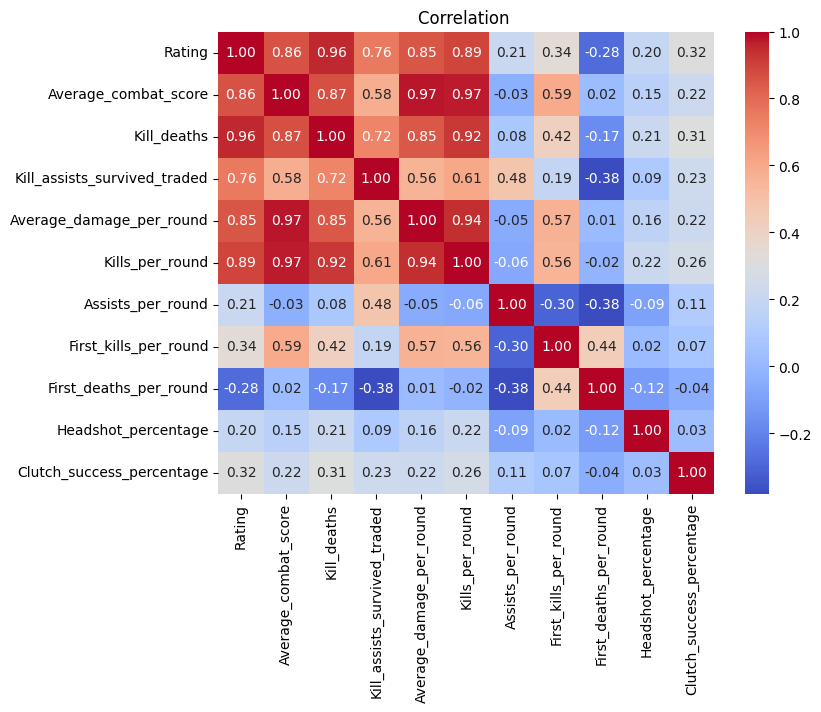

In [88]:
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation ")
plt.show()

In [89]:
#Visualtization 


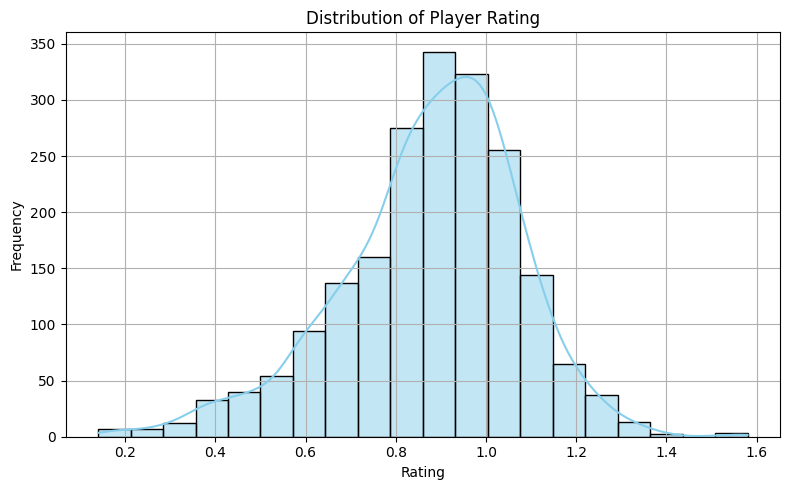

In [90]:
#Distribution of Rating
plt.figure(figsize=(8, 5))
sns.histplot(df['Rating'].dropna(), kde=True, bins=20, color='skyblue')
plt.title("Distribution of Player Rating")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

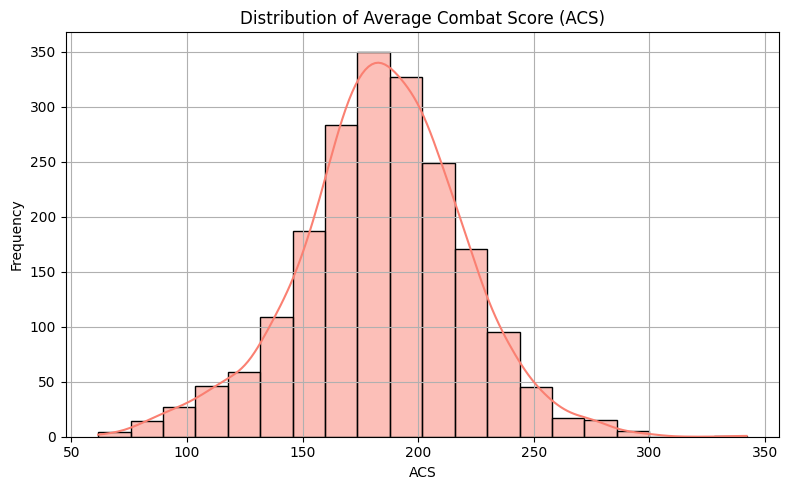

In [91]:
#Distribution of ACS
plt.figure(figsize=(8, 5))
sns.histplot(df['Average_combat_score'].dropna(), kde=True, bins=20, color='salmon')
plt.title("Distribution of Average Combat Score (ACS)")
plt.xlabel("ACS")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

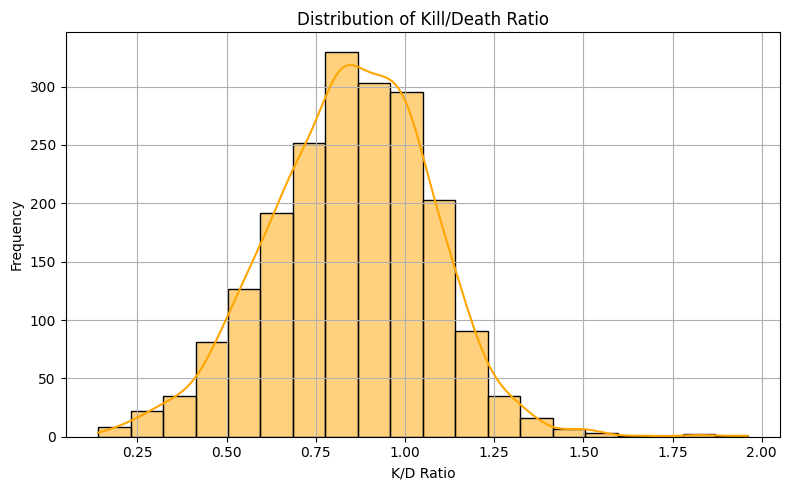

In [92]:
#Distribution of Kill_death Ratio
plt.figure(figsize=(8, 5))
sns.histplot(df['Kill_deaths'].dropna(), kde=True, bins=20, color='orange')
plt.title("Distribution of Kill/Death Ratio")
plt.xlabel("K/D Ratio")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()


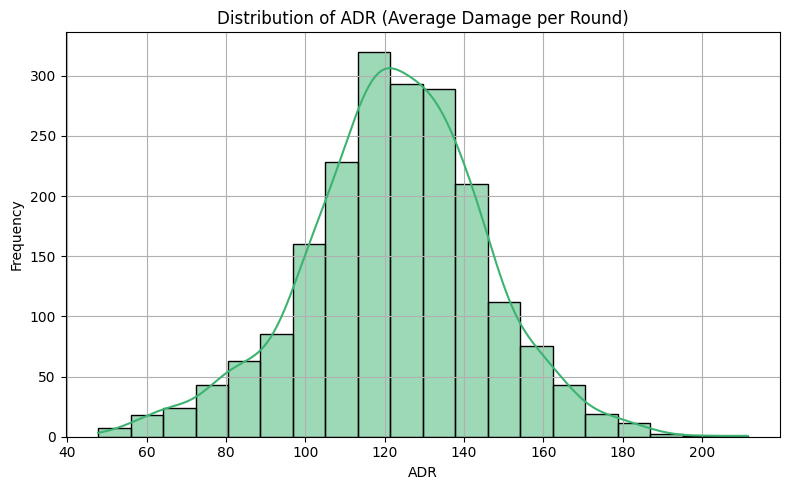

In [93]:
#Distribution of ADR
plt.figure(figsize=(8, 5))
sns.histplot(df['Average_damage_per_round'].dropna(), kde=True, bins=20, color='mediumseagreen')
plt.title("Distribution of ADR (Average Damage per Round)")
plt.xlabel("ADR")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

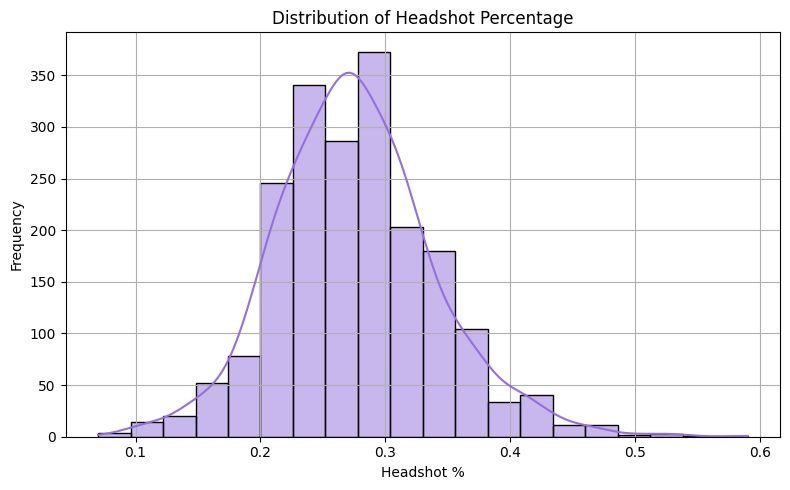

In [94]:
#Distibution of Headshot
plt.figure(figsize=(8, 5))
sns.histplot(df['Headshot_percentage'].dropna(), kde=True, bins=20, color='mediumpurple')
plt.title("Distribution of Headshot Percentage")
plt.xlabel("Headshot %")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

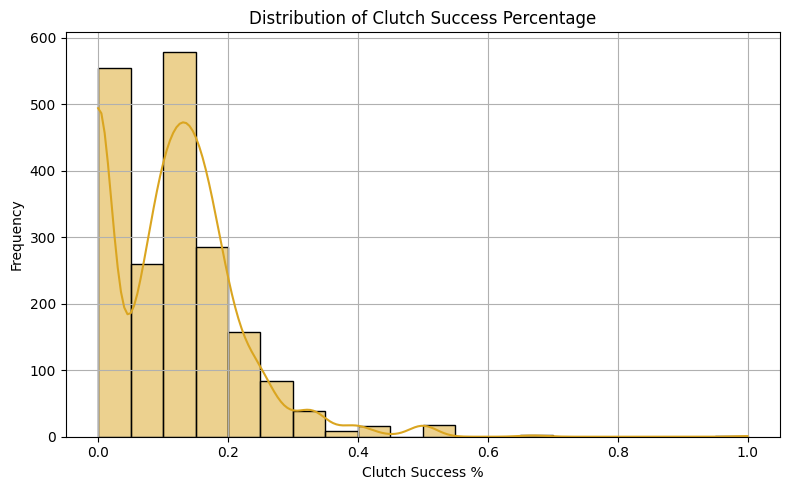

In [95]:
#Clutch Success
plt.figure(figsize=(8, 5))
sns.histplot(df['Clutch_success_percentage'].dropna(), kde=True, bins=20, color='goldenrod')
plt.title("Distribution of Clutch Success Percentage")
plt.xlabel("Clutch Success %")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

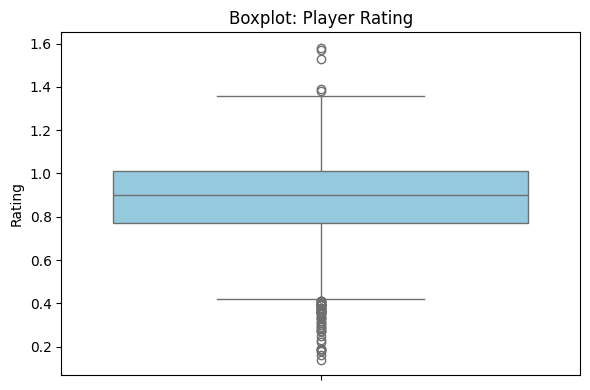

In [96]:
#Box - plot : Rating
plt.figure(figsize=(6, 4))
sns.boxplot(y=df['Rating'].dropna(), color='skyblue')
plt.title("Boxplot: Player Rating")
plt.grid(False)
plt.tight_layout()
plt.show()


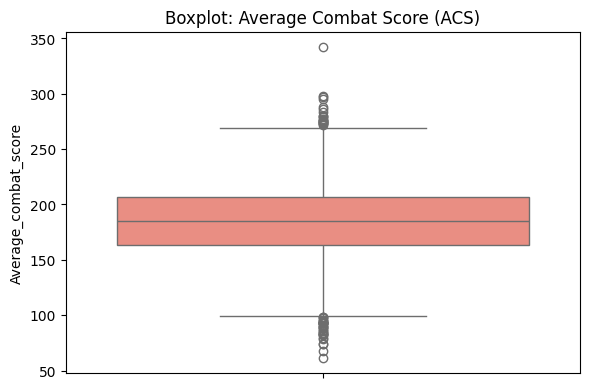

In [97]:
#Box - plot : ACS
plt.figure(figsize=(6, 4))
sns.boxplot(y=df['Average_combat_score'].dropna(), color='salmon')
plt.title("Boxplot: Average Combat Score (ACS)")
plt.grid(False)
plt.tight_layout()
plt.show()

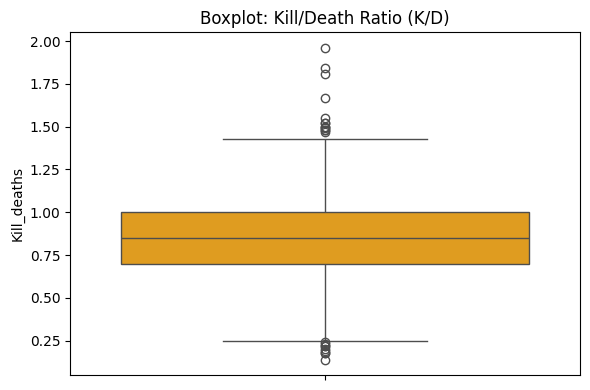

In [98]:
#Box - plot : K/D
plt.figure(figsize=(6, 4))
sns.boxplot(y=df['Kill_deaths'].dropna(), color='orange')
plt.title("Boxplot: Kill/Death Ratio (K/D)")
plt.grid(False)
plt.tight_layout()
plt.show()

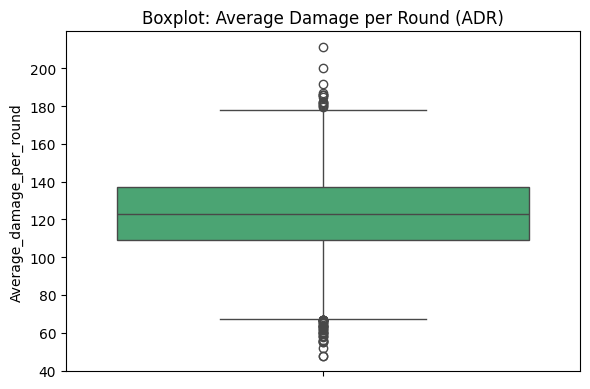

In [99]:
#Box - plot : ADR
plt.figure(figsize=(6, 4))
sns.boxplot(y=df['Average_damage_per_round'].dropna(), color='mediumseagreen')
plt.title("Boxplot: Average Damage per Round (ADR)")
plt.grid(False)
plt.tight_layout()
plt.show()

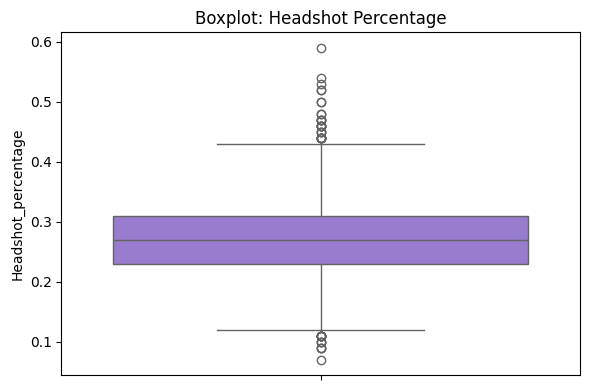

In [100]:
#Box - plot : Headshot
plt.figure(figsize=(6, 4))
sns.boxplot(y=df['Headshot_percentage'].dropna(), color='mediumpurple')
plt.title("Boxplot: Headshot Percentage")
plt.grid(False)
plt.tight_layout()
plt.show()

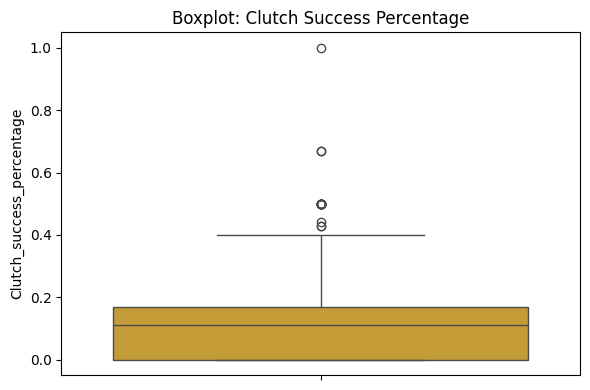

In [101]:
#Box - plot : Clutch Success %
plt.figure(figsize=(6, 4))
sns.boxplot(y=df['Clutch_success_percentage'].dropna(), color='goldenrod')
plt.title("Boxplot: Clutch Success Percentage")
plt.grid(False)
plt.tight_layout()
plt.show()

In [102]:
Q1 = df['Rating'].quantile(0.25)
Q3 = df['Rating'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df_rating_cleaned = df[(df['Rating'] >= lower) & (df['Rating'] <= upper)]
print(f"Rating cleaned: {df_rating_cleaned.shape}")



Rating cleaned: (1943, 16)


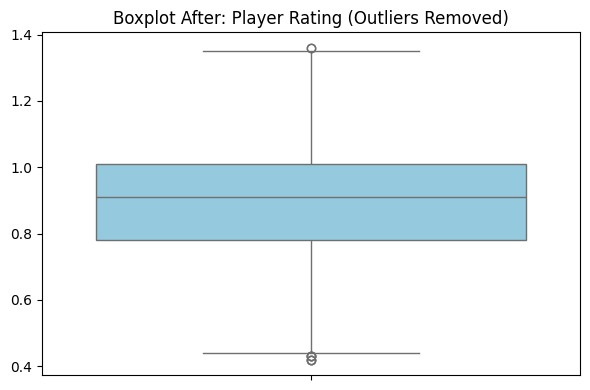

In [103]:
plt.figure(figsize=(6, 4))
sns.boxplot(y=[*df_rating_cleaned['Rating']], color='skyblue')
plt.title("Boxplot After: Player Rating (Outliers Removed)")
plt.grid(False)
plt.tight_layout()
plt.show()

In [104]:
col = 'Average_combat_score'
Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df_acs_cleaned = df[(df[col] >= lower) & (df[col] <= upper)]
print(f"ACS cleaned: {df_acs_cleaned.shape}")

ACS cleaned: (1950, 16)


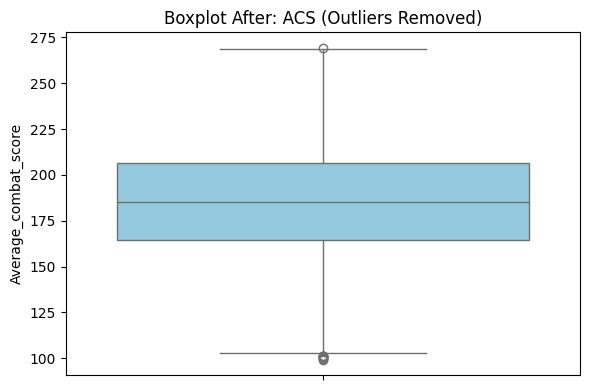

In [105]:
plt.figure(figsize=(6, 4))
sns.boxplot(y=df_acs_cleaned['Average_combat_score'], color='skyblue')
plt.title("Boxplot After: ACS (Outliers Removed)")
plt.grid(False)
plt.tight_layout()
plt.show()

C:\Users\Anuj\AppData\Local\Temp\ipykernel_6160\1730516488.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data= region_counts, y='Region', x='Player Count', palette='magma', ax=axes[0])
C:\Users\Anuj\AppData\Local\Temp\ipykernel_6160\1730516488.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=team_counts, y='Team', x='Player Count', palette='coolwarm', ax=axes[1])


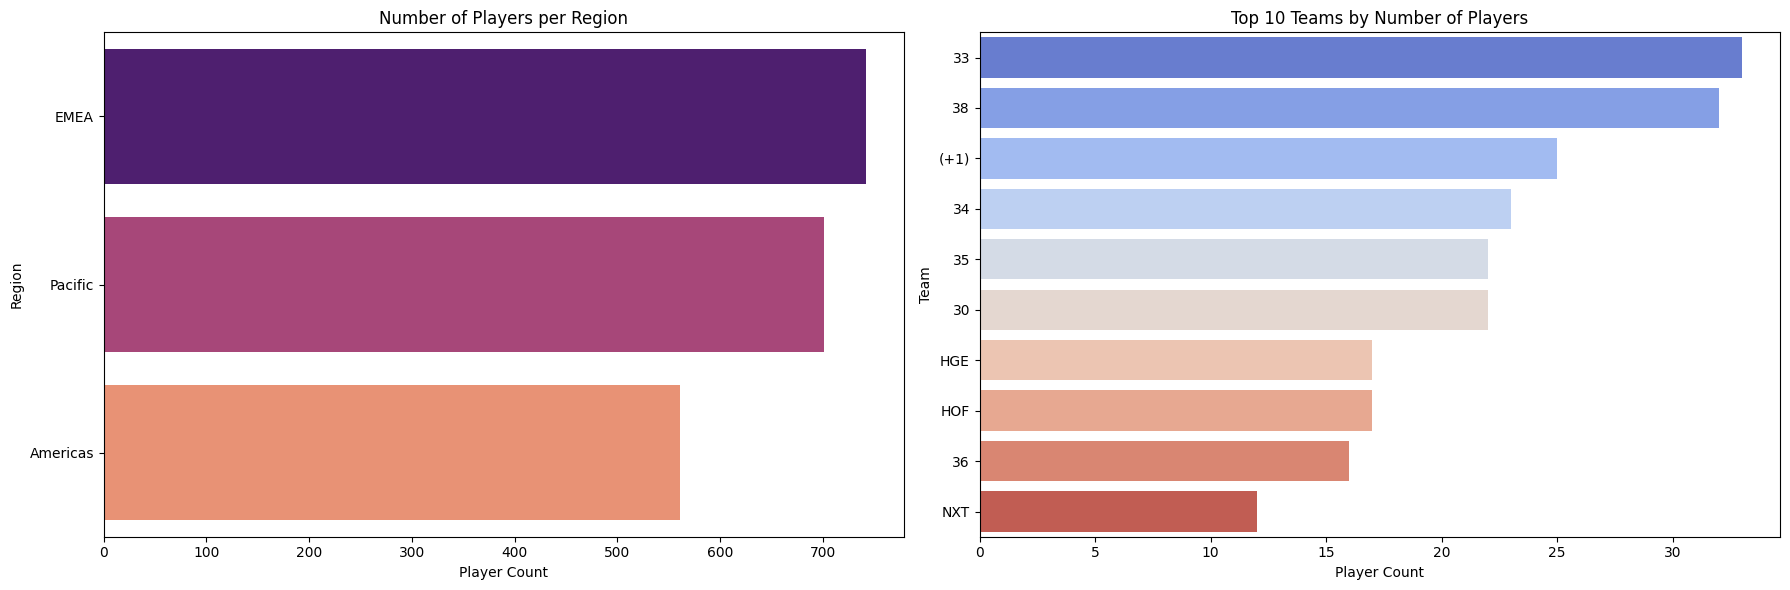

In [106]:
# Region counts
region_counts = df['Region'].value_counts().reset_index()
region_counts.columns = ['Region', 'Player Count']

# Team counts (top 10)
team_counts = df['Team'].value_counts().nlargest(10).reset_index()
team_counts.columns = ['Team', 'Player Count']

# Plot
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Regions
sns.barplot(data= region_counts, y='Region', x='Player Count', palette='magma', ax=axes[0])
axes[0].set_title('Number of Players per Region')

# Teams
sns.barplot(data=team_counts, y='Team', x='Player Count', palette='coolwarm', ax=axes[1])
axes[1].set_title('Top 10 Teams by Number of Players')

plt.tight_layout()
plt.show()

In [107]:
#Bivarient

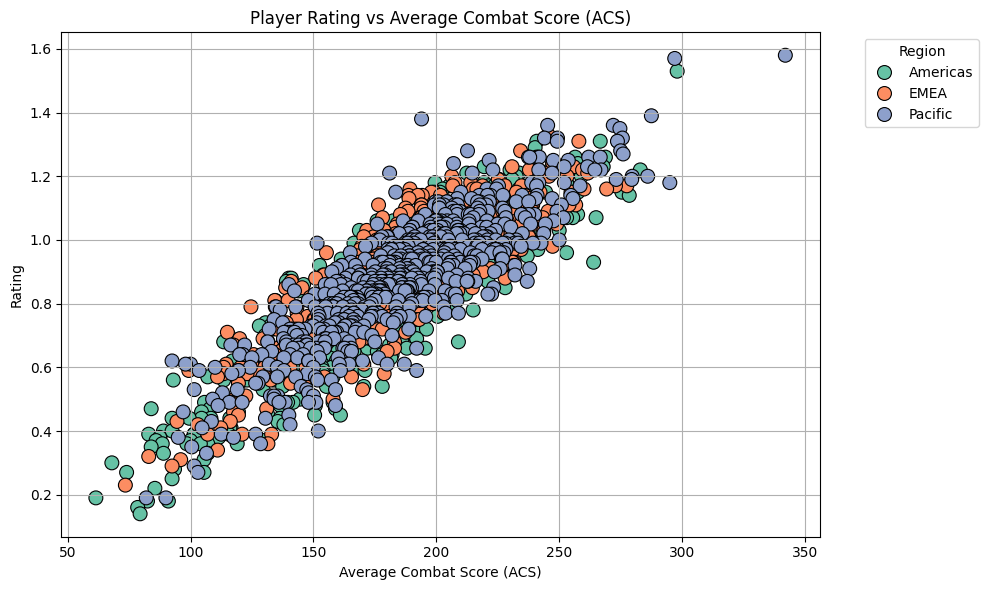

In [108]:
# Scatter Plot: Rating vs ACS
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='Average_combat_score',
    y='Rating',
    hue='Region',
    palette='Set2',
    s=100,
    edgecolor='black'
)
plt.title("Player Rating vs Average Combat Score (ACS)")
plt.xlabel("Average Combat Score (ACS)")
plt.ylabel("Rating")
plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


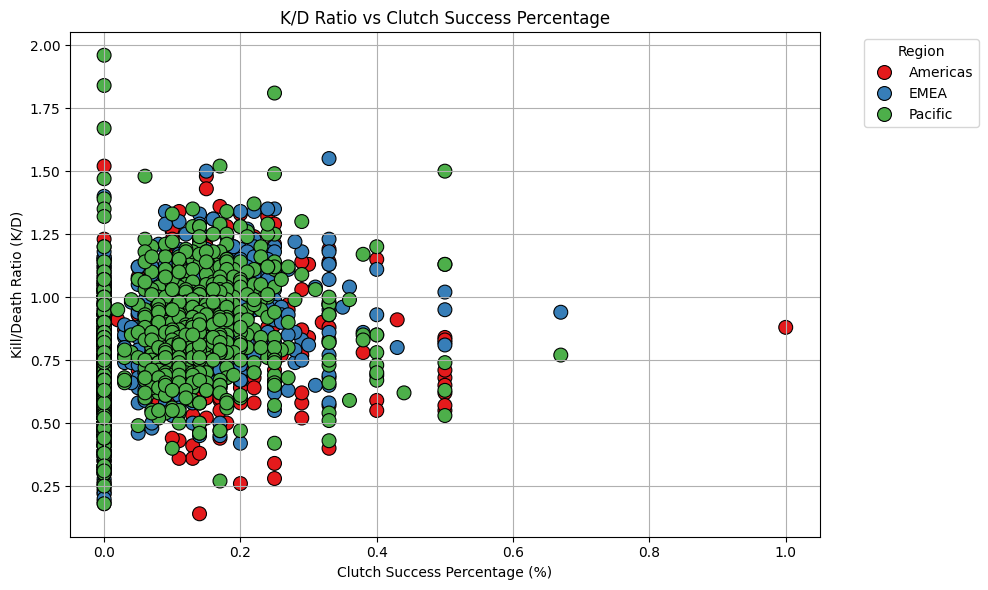

In [109]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='Clutch_success_percentage',
    y='Kill_deaths',
    hue='Region',
    palette='Set1',
    s=100,
    edgecolor='black'
)
plt.title("K/D Ratio vs Clutch Success Percentage")
plt.xlabel("Clutch Success Percentage (%)")
plt.ylabel("Kill/Death Ratio (K/D)")
plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

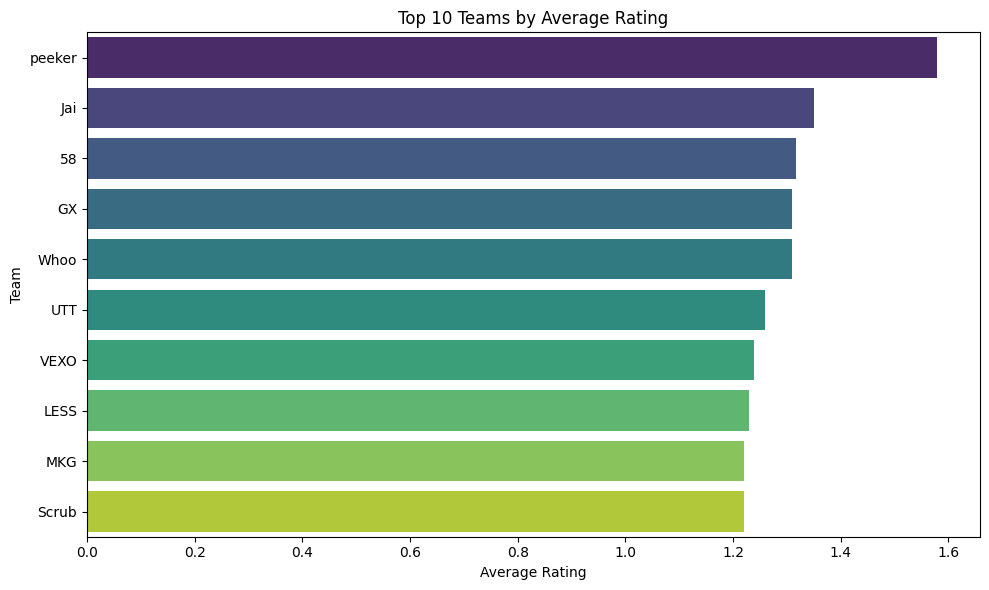

In [110]:
top_teams = (
    df.groupby('Team')['Rating']
    .mean()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_teams, x='Rating', y='Team', hue='Team', palette='viridis')
plt.title("Top 10 Teams by Average Rating")
plt.xlabel("Average Rating")
plt.ylabel("Team")
plt.tight_layout()
plt.show()

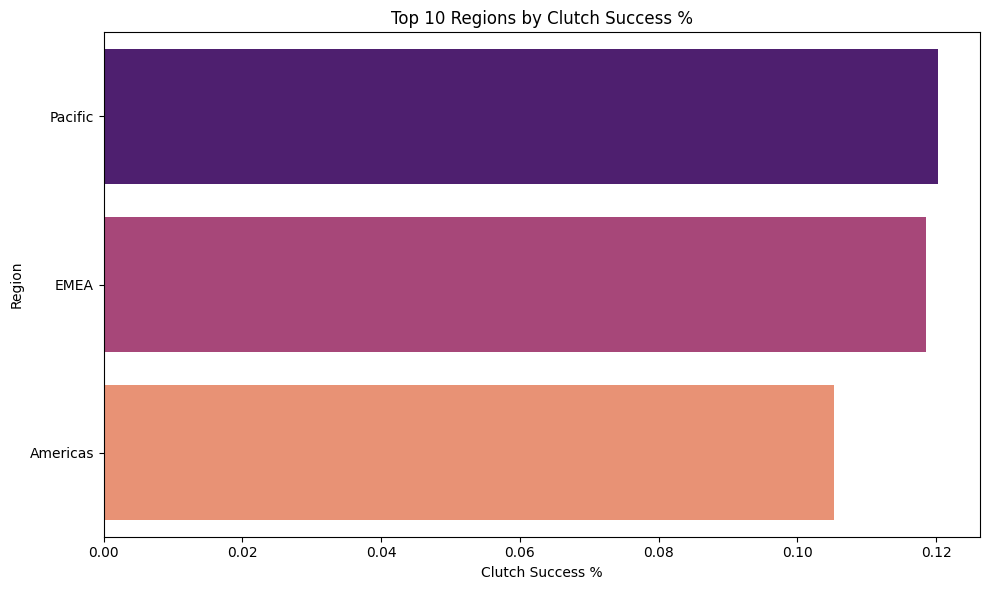

In [111]:
top_regions = (
    df.groupby('Region')['Clutch_success_percentage']
    .mean()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_regions, x='Clutch_success_percentage', y='Region',hue='Region', palette='magma')
plt.title("Top 10 Regions by Clutch Success %")
plt.xlabel("Clutch Success %")
plt.ylabel("Region")
plt.tight_layout()
plt.show()

C:\Users\Anuj\AppData\Local\Temp\ipykernel_6160\1301489068.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_agents.values, y=top_agents.index, palette='Set2')


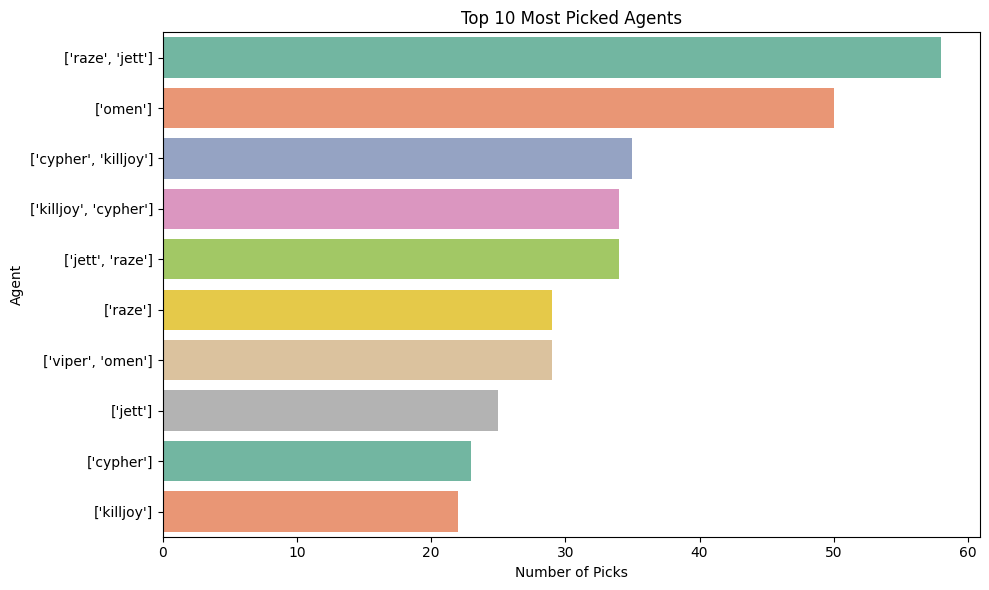

In [112]:
top_agents = df['Agent'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_agents.values, y=top_agents.index, palette='Set2')
plt.title("Top 10 Most Picked Agents")
plt.xlabel("Number of Picks")
plt.ylabel("Agent")
plt.tight_layout()
plt.show()

In [113]:
#Difference in Average Rating between EMEA and Asia Players
from scipy.stats import ttest_ind

# Selecting the rating data for EMEA and Asia
emea = df[df['Region'] == 'EMEA']['Rating'].dropna()
asia = df[df['Region'] == 'Asia']['Rating'].dropna()

# Applying Welch's t-test
t_stat, p_val = ttest_ind(emea, asia, equal_var=False)

print(f"T-Statistic: {t_stat:.3f}")
print(f"P-Value: {p_val:.4f}")

T-Statistic: nan
P-Value: nan


c:\Users\Anuj\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\_lib\deprecation.py:234: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  return f(*args, **kwargs)


In [114]:
from scipy.stats import ttest_ind, f_oneway, norm
import numpy as np

# 1️⃣ T-Test: Compare rating between Americas and EMEA
americas_rating = df[df['Region'] == 'Americas']['Rating'].dropna()
emea_rating = df[df['Region'] == 'EMEA']['Rating'].dropna()

t_stat, t_p = ttest_ind(americas_rating, emea_rating, equal_var=False)
print("🔹 T-Test: Americas vs EMEA (Rating)")
print(f"T-Statistic: {t_stat:.3f}")
print(f"P-Value: {t_p:.4f}\n")

# 2️⃣ ANOVA: Compare ACS across Asia, EMEA, Americas
asia_acs = df[df['Region'] == 'Asia']['Average_combat_score'].dropna()
emea_acs = df[df['Region'] == 'EMEA']['Average_combat_score'].dropna()
americas_acs = df[df['Region'] == 'Americas']['Average_combat_score'].dropna()

if len(asia_acs) > 1 and len(emea_acs) > 1 and len(americas_acs) > 1:
    anova_stat, anova_p = f_oneway(asia_acs, emea_acs, americas_acs)
    print("🔹 ANOVA: ACS across Regions")
    print(f"F-Statistic: {anova_stat:.3f}")
    print(f"P-Value: {anova_p:.4f}\n")
else:
    print("⚠️ ANOVA could not be performed due to insufficient data in one or more regions.\n")

# 3️⃣ Z-Test: Check if ADR mean differs from 150
adr = df['Average_damage_per_round'].dropna()
sample_mean = adr.mean()
population_mean = 150
sample_std = adr.std()
sample_size = len(adr)

z_stat = (sample_mean - population_mean) / (sample_std / np.sqrt(sample_size))
z_p = 2 * (1 - norm.cdf(abs(z_stat)))  # two-tailed

print("🔹 Z-Test: ADR vs Population Mean (150)")
print(f"Z-Statistic: {z_stat:.3f}")
print(f"P-Value: {z_p:.4f}")

🔹 T-Test: Americas vs EMEA (Rating)
T-Statistic: -6.368
P-Value: 0.0000

⚠️ ANOVA could not be performed due to insufficient data in one or more regions.

🔹 Z-Test: ADR vs Population Mean (150)
Z-Statistic: -54.133
P-Value: 0.0000


In [ ]:
# Export the cleaned DataFrame to a new CSV file
cleaned_csv_path = 'cleaned_export.csv'
df.to_csv(cleaned_csv_path, index=False)
print(f"Cleaned CSV saved to {cleaned_csv_path}")


In [ ]:
from scipy.stats import chi2_contingency
import pandas as pd

# Create contingency table: Region vs Agent
contingency_table = pd.crosstab(df['Region'], df['Agent'])

# Perform Chi-Square test of independence
chi2_stat, chi_p, dof, expected = chi2_contingency(contingency_table)

# Display results
print("🔹 Chi-Square Test: Agent vs Region")
print(f"Chi-Square Statistic: {chi2_stat:.2f}")
print(f"Degrees of Freedom: {dof}")
print(f"P-Value: {chi_p:.5f}")

# Decision based on p-value
if chi_p < 0.05:
    print("✅ Conclusion: Reject the null hypothesis — agent selection depends on region.")
else:
    print("✅ Conclusion: Fail to reject the null hypothesis — no relationship found.")

🔹 Chi-Square Test: Agent vs Region
Chi-Square Statistic: 1849.42
Degrees of Freedom: 1768
P-Value: 0.08692
✅ Conclusion: Fail to reject the null hypothesis — no relationship found.
